In [1]:
from pysus.online_data.ESUS import download
import pandas as pd

# Downloading data from ESUS
This function alows for the download of COVID-19 data from ESUS. For Some States, the size of the resulting table can easily exceed the memory size of most personal computers, in such cases, the ESUS download function will stream the data to disk without filling up the memory and return an iterator of chunks of 1000 rows of data. The user must then iterate over the chunks to analyze the data.

In [2]:
df = download(uf='se')

In [3]:
df.head()

,dataNotificacao,dataInicioSintomas,dataTeste,estrangeiro,profissionalSaude,profissionalSeguranca,cbo,sexo,racaCor,estado,...,tipoTesteSorologico,resultadoTesteSorologicoIgA,resultadoTesteSorologicoIgG,resultadoTesteSorologicoIgM,resultadoTesteSorologicoTotais,@timestamp,estadoIBGE,estadoNotificacaoIBGE,municipioIBGE,municipioNotificacaoIBGE
0,2020-07-04T14:37:16.521Z,2020-06-30T03:00:00.000Z,2020-07-03T03:00:00.000Z,None,Não,Não,None,Feminino,Branca,SERGIPE,...,None,None,None,None,None,2021-03-02T20:10:19.244Z,28,28,2800308,2800308
1,2020-07-03T03:00:00.000Z,2020-06-25T03:00:00.000Z,2020-07-03T03:00:00.000Z,Não,Sim,Não,3222 - Técnico ou Auxiliar em Enfermagem,Feminino,Parda,SERGIPE,...,None,None,None,None,None,2021-03-02T20:10:19.244Z,28,28,2800308,2806701
2,2020-07-04T14:40:48.582Z,2020-06-26T03:00:00.000Z,2020-07-03T03:00:00.000Z,None,Sim,Não,251605 - Assistente Social,Feminino,Parda,SERGIPE,...,None,None,None,None,None,2021-03-02T20:10:19.244Z,28,28,2800308,2800308
3,2020-07-04T14:45:52.616Z,2020-07-03T03:00:00.000Z,2020-07-03T03:00:00.000Z,None,Sim,Não,2232 - Cirurgião-Dentista,Feminino,Parda,SERGIPE,...,None,None,None,None,None,2021-03-02T20:10:19.244Z,28,28,2800308,2800308
4,2020-07-04T14:47:55.651Z,2020-06-16T03:00:00.000Z,2020-06-04T03:00:00.000Z,None,Não,Não,None,Masculino,Parda,SERGIPE,...,None,None,None,None,None,2021-03-02T20:10:19.244Z,28,28,2800308,2800308


In [13]:
for cname in df:
    if cname.startswith('data'):
        df[cname] = pd.to_datetime(df[cname], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381068 entries, 0 to 381067
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype              
---  ------                          --------------   -----              
 0   index                           381068 non-null  int64              
 1   dataNotificacao                 380858 non-null  datetime64[ns, UTC]
 2   dataInicioSintomas              380925 non-null  datetime64[ns, UTC]
 3   dataTeste                       305246 non-null  datetime64[ns, UTC]
 4   estrangeiro                     72903 non-null   object             
 5   profissionalSaude               380962 non-null  object             
 6   profissionalSeguranca           372901 non-null  object             
 7   cbo                             27338 non-null   object             
 8   sexo                            381067 non-null  object             
 9   racaCor                         370430 non-null  object             
 

Now we will create a datetime index for our dataframe, but we must be carefull with missing dates here. For now, to enable a quick visualization, we will simply coerce missing dates to `NaT`.

In [4]:
df['datesint'] = pd.to_datetime(df['dataInicioSintomas'],errors='coerce')
# df = df.dropna()
df.set_index('datesint', inplace=True);

Now we can count the cases per day and plot.

In [5]:
df_day = df.resample('D').count()
df_day.head()

,dataNotificacao,dataInicioSintomas,dataTeste,estrangeiro,profissionalSaude,profissionalSeguranca,cbo,sexo,racaCor,estado,...,tipoTesteSorologico,resultadoTesteSorologicoIgA,resultadoTesteSorologicoIgG,resultadoTesteSorologicoIgM,resultadoTesteSorologicoTotais,@timestamp,estadoIBGE,estadoNotificacaoIBGE,municipioIBGE,municipioNotificacaoIBGE
datesint,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00+00:00,17,17,9,7,17,16,2,17,17,17,...,2,0,1,1,0,17,17,17,17,17
2020-01-02 00:00:00+00:00,16,16,10,1,16,16,1,16,16,16,...,1,0,1,1,0,16,16,16,16,16
2020-01-03 00:00:00+00:00,15,15,9,2,15,15,2,15,15,15,...,0,0,0,0,0,15,15,15,15,15
2020-01-04 00:00:00+00:00,19,19,13,0,19,19,1,19,18,19,...,0,0,0,0,0,19,19,19,19,19
2020-01-05 00:00:00+00:00,4,4,1,0,4,4,0,4,4,4,...,1,0,1,1,0,4,4,4,4,4


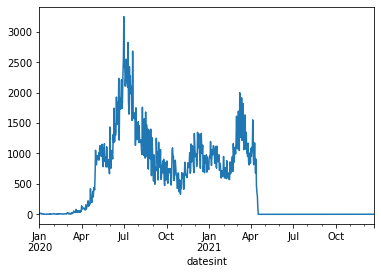

In [6]:
df_day.estadoIBGE.plot();

## Deduplicating the data
ESUS records are know to have a number of duplicated records. Let's see here how to detect possible duplicates in the dataframe we have just downloaded.  For that we will need the [`recordlinkage`](https://recordlinkage.readthedocs.io/en/latest/index.html) package.

In [7]:
!pip3 install recordlinkage

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable


In [5]:
import recordlinkage

In [6]:
dup_index = recordlinkage.Index()

In [7]:
df.reset_index(inplace=True)
df['dataInicioSintomas'] = pd.to_datetime(df['dataInicioSintomas'], errors='coerce')

In [11]:
dup_index = recordlinkage.Index()
dup_index.block(['municipio','dataTeste'])
# dup_index.sortedneighbourhood(['municipio','dataTeste'])
dup_candidates = dup_index.index(df)
len(dup_candidates)

34406552

In [12]:
compare_dups = recordlinkage.Compare()
compare_dups.string('sintomas', 'sintomas', threshold=0.85, label='sintomas', method='jarowinkler')
compare_dups.date('dataInicioSintomas', 'dataInicioSintomas', label='dataInicioSintomas')

<Compare>

In [16]:
dup_features = compare_dups.compute(dup_candidates,df)

In [17]:
dup_features

sintomas
1      0            0.0
2      0            0.0
       1            0.0
3      0            0.0
       1            0.0
...                 ...
381057 380968       0.0
       380990       0.0
       381019       0.0
       381048       0.0
       381050       0.0

[34406552 rows x 1 columns]

In [18]:
dup_features.sum(axis=1).value_counts().sort_index(ascending=False)

1.0     5910561
0.0    28495991
dtype: int64

In [24]:
potential_dups = dup_features[dup_features.sum(axis=1) >= 1]#.reset_index()
# potential_dups['Score'] = potential_dups.loc[:, 'sintomas':'dataInicioSintomas'].sum(axis=1)

In [25]:
potential_dups

sintomas
9      5            1.0
12     3            1.0
15     3            1.0
       12           1.0
23     3            1.0
...                 ...
380990 380953       1.0
381048 381019       1.0
381050 381019       1.0
       381048       1.0
381057 380939       1.0

[5910561 rows x 1 columns]

In [ ]:
potential_dups